<h1 style='color: green; text-align:center'>Principal Component Analysis</h1>

<h2 style='color: purple'>Import libraries and packages</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sns.set()
pd.set_option('display.max_columns', None)

<h2 style='color: purple'>Set Style Plot</h2>

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

<h2 style='color: purple'>Initialize and load dataset</h2>

In [3]:
airline_passenger_satisfaction_no_mv = pd.read_csv('dataset/airline_passenger_satisfaction_no_mv.csv')

<h2 style='color: purple'>Show dataset in table</h2>

In [4]:
airline_passenger_satisfaction_no_mv

Unnamed: 0      id             Satisfaction  Gender  \
0                0   11112                satisfied  Female   
1                1  110278                satisfied    Male   
2                2  103199                satisfied  Female   
3                3   47462                satisfied  Female   
4                4  120011                satisfied  Female   
...            ...     ...                      ...     ...   
129482      129875  119211                satisfied  Female   
129483      129876   97768  neutral or dissatisfied    Male   
129484      129877  125368  neutral or dissatisfied    Male   
129485      129878     251  neutral or dissatisfied    Male   
129486      129879   84566  neutral or dissatisfied  Female   

            Customer Type  Age   Type of Travel     Class  Flight Distance  \
0          Loyal Customer   65  Personal Travel       Eco              265   
1          Loyal Customer   47  Personal Travel  Business             2464   
2          Loyal Customer   15  Personal Travel       Eco             2138   
3          Loyal Customer   60  Personal Travel       Eco              623   
4          Loyal Customer   70  Personal Travel       Eco              354   
...                   ...  ...              ...       ...              ...   
129482  disloyal Customer   29  Personal Travel       Eco             1731   
129483  disloyal Customer   63  Personal Travel  Business             2087   
129484  disloyal Customer   69  Personal Travel       Eco             2320   
129485  disloyal Customer   66  Personal Travel       Eco             2450   
129486  disloyal Customer   38  Personal Travel       Eco             4307   

        Seat comfort  Departure/Arrival time convenient  Food and drink  \
0                  0                                  0               0   
1                  0                                  0               0   
2                  0                                  0               0   
3                  0                                  0               0   
4                  0                                  0               0   
...              ...                                ...             ...   
129482             5                                  5               5   
129483             2                                  3               2   
129484             3                                  0               3   
129485             3                                  2               3   
129486             3                                  4               3   

        Gate location  Inflight wifi service  Inflight entertainment  \
0                   2                      2                       4   
1                   3                      0                       2   
2                   3                      2                       0   
3                   3                      3                       4   
4                   3                      4                       3   
...               ...                    ...                     ...   
129482              3                      2                       5   
129483              4                      2                       1   
129484              3                      3                       2   
129485              2                      3                       2   
129486              3                      3                       3   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129482               2                       2                 3   
1294

<h2 style='color: purple'>Replace feature non-metric value with metric value</h2>

In [5]:
airline_passenger_satisfaction_replace = airline_passenger_satisfaction_no_mv.copy()

airline_passenger_satisfaction_replace['Satisfaction']   = airline_passenger_satisfaction_no_mv['Satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
airline_passenger_satisfaction_replace['Gender']         = airline_passenger_satisfaction_no_mv['Gender'].map({'Female':0, 'Male':1})
airline_passenger_satisfaction_replace['Customer Type']  = airline_passenger_satisfaction_no_mv['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})
airline_passenger_satisfaction_replace['Type of Travel'] = airline_passenger_satisfaction_no_mv['Type of Travel'].map({'Business travel':0, 'Personal Travel':1})
airline_passenger_satisfaction_replace['Class']          = airline_passenger_satisfaction_no_mv['Class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})

In [6]:
airline_passenger_satisfaction_replace

Unnamed: 0      id  Satisfaction  Gender  Customer Type  Age  \
0                0   11112             1       0              1   65   
1                1  110278             1       1              1   47   
2                2  103199             1       0              1   15   
3                3   47462             1       0              1   60   
4                4  120011             1       0              1   70   
...            ...     ...           ...     ...            ...  ...   
129482      129875  119211             1       0              0   29   
129483      129876   97768             0       1              0   63   
129484      129877  125368             0       1              0   69   
129485      129878     251             0       1              0   66   
129486      129879   84566             0       0              0   38   

        Type of Travel  Class  Flight Distance  Seat comfort  \
0                    1      0              265             0   
1                    1      2             2464             0   
2                    1      0             2138             0   
3                    1      0              623             0   
4                    1      0              354             0   
...                ...    ...              ...           ...   
129482               1      0             1731             5   
129483               1      2             2087             2   
129484               1      0             2320             3   
129485               1      0             2450             3   
129486               1      0             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       0               0              2   
1                                       0               0              3   
2                                       0               0              3   
3                                       0               0              3   
4                                       0               0              3   
...                                   ...             ...            ...   
129482                                  5               5              3   
129483                                  3               2              4   
129484                                  0               3              3   
129485                                  2               3              2   
129486                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  \
0                           2                       4               2   
1                           0                       2               2   
2                           2                       0               2   
3                           3                       4               3   
4                           4                       3               4   
...                       ...                     ...             ...   
129482                      2                       5               2   
129483                      2                       1               1   
129484                      3                       2               2   
129485                      3                       2               2   
129486                      3                       3               3   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129482                       2                 3                 3   
129483                  

In [7]:
airline_passenger_satisfaction_replace

Unnamed: 0      id  Satisfaction  Gender  Customer Type  Age  \
0                0   11112             1       0              1   65   
1                1  110278             1       1              1   47   
2                2  103199             1       0              1   15   
3                3   47462             1       0              1   60   
4                4  120011             1       0              1   70   
...            ...     ...           ...     ...            ...  ...   
129482      129875  119211             1       0              0   29   
129483      129876   97768             0       1              0   63   
129484      129877  125368             0       1              0   69   
129485      129878     251             0       1              0   66   
129486      129879   84566             0       0              0   38   

        Type of Travel  Class  Flight Distance  Seat comfort  \
0                    1      0              265             0   
1                    1      2             2464             0   
2                    1      0             2138             0   
3                    1      0              623             0   
4                    1      0              354             0   
...                ...    ...              ...           ...   
129482               1      0             1731             5   
129483               1      2             2087             2   
129484               1      0             2320             3   
129485               1      0             2450             3   
129486               1      0             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       0               0              2   
1                                       0               0              3   
2                                       0               0              3   
3                                       0               0              3   
4                                       0               0              3   
...                                   ...             ...            ...   
129482                                  5               5              3   
129483                                  3               2              4   
129484                                  0               3              3   
129485                                  2               3              2   
129486                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  \
0                           2                       4               2   
1                           0                       2               2   
2                           2                       0               2   
3                           3                       4               3   
4                           4                       3               4   
...                       ...                     ...             ...   
129482                      2                       5               2   
129483                      2                       1               1   
129484                      3                       2               2   
129485                      3                       2               2   
129486                      3                       3               3   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129482                       2                 3                 3   
129483                  

In [8]:
end = airline_passenger_satisfaction_replace['Customer Type']

airline_passenger_satisfaction_replace.drop(labels=['Customer Type'], axis=1,inplace = True)
airline_passenger_satisfaction_replace.insert(24, 'Customer Type', end)

del airline_passenger_satisfaction_replace['Unnamed: 0']

In [9]:
airline_passenger_satisfaction_replace

id  Satisfaction  Gender  Age  Type of Travel  Class  \
0        11112             1       0   65               1      0   
1       110278             1       1   47               1      2   
2       103199             1       0   15               1      0   
3        47462             1       0   60               1      0   
4       120011             1       0   70               1      0   
...        ...           ...     ...  ...             ...    ...   
129482  119211             1       0   29               1      0   
129483   97768             0       1   63               1      2   
129484  125368             0       1   69               1      0   
129485     251             0       1   66               1      0   
129486   84566             0       0   38               1      0   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265             0                                  0   
1                  2464             0                                  0   
2                  2138             0                                  0   
3                   623             0                                  0   
4                   354             0                                  0   
...                 ...           ...                                ...   
129482             1731             5                                  5   
129483             2087             2                                  3   
129484             2320             3                                  0   
129485             2450             3                                  2   
129486             4307             3                                  4   

        Food and drink  Gate location  Inflight wifi service  \
0                    0              2                      2   
1                    0              3                      0   
2                    0              3                      2   
3                    0              3                      3   
4                    0              3                      4   
...                ...            ...                    ...   
129482               5              3                      2   
129483               2              4                      2   
129484               3              3                      3   
129485               3              2                      3   
129486               3              3                      3   

        Inflight entertainment  Online support  Ease of Online booking  \
0                            4               2                       3   
1                            2               2                       3   
2                            0               2                       2   
3                            4               3                       1   
4                            3               4                       2   
...                        ...             ...                     ...   
129482                       5               2                       2   
129483                       1               1                       3   
129484                       2               2                       4   
129485                       2               2                       3   
129486                       3               3                       4   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      3                 0                 3                5   
1                      4                 4                 4                2   
2                      3                 3                 4                4   
3                      1                 0                 1                4   
4                      2                 0                 2                4   
...                  ...               ...               ...              ...   
129482                 3                 3               

In [10]:
airline_passenger_satisfaction_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
id                                   129487 non-null int64
Satisfaction                         129487 non-null int64
Gender                               129487 non-null int64
Age                                  129487 non-null int64
Type of Travel                       129487 non-null int64
Class                                129487 non-null int64
Flight Distance                      129487 non-null int64
Seat comfort                         129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Food and drink                       129487 non-null int64
Gate location                        129487 non-null int64
Inflight wifi service                129487 non-null int64
Inflight entertainment               129487 non-null int64
Online support                       129487 non-null int64
Ease of Online booking               129487 non-null int64
On-b

<h2 style='color: purple'>Standardize the Data</h2>

In [11]:
X = airline_passenger_satisfaction_replace.iloc[:, 0:23].values
y = airline_passenger_satisfaction_replace["Customer Type"].values

In [12]:
X = StandardScaler().fit_transform(X)

<h2 style='color: purple'>Compute the Eigenvectors and Eigenvalues</h2>

<h3 style='color: orange'>Covariance Matrix</h3>

In [13]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00000772e+00,  1.34783103e-02, -1.02673978e-03,
         2.04429455e-02, -7.34293572e-04,  9.72937578e-02,
         5.45392492e-02, -1.97003370e-02,  1.41460161e-03,
         1.24103801e-02,  6.72235664e-04, -6.21845031e-05,
         5.43784771e-02,  5.41872557e-02,  1.13517966e-03,
         5.59655492e-02,  4.22057205e-02,  7.46750259e-02,
         8.23582126e-02,  8.08370768e-02,  2.56567022e-02,
        -1.75056633e-02, -3.56570642e-02],
       [ 1.34783103e-02,  1.00000772e+00, -2.12051881e-01,
         1.17913547e-01, -1.08910987e-01,  3.05576204e-01,
        -3.91331551e-02,  2.42372772e-01, -1.56236595e-02,
         1.20569195e-01, -1.22722916e-02,  2.27011495e-01,
         5.23367578e-01,  3.89892829e-01,  4.32020042e-01,
         3.52285328e-01,  3.05117796e-01,  2.60400224e-01,
         2.66090961e-01,  2.59506056e-01,  3.38120297e-01,
        -7.39603778e-02, -8.06914211e-02],
       [-1.02673978e-03, -2.12051881e-01,  1.00000772e+00,
         8.98372313e-03,  9.2

In [14]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

<h3 style='color: orange'>Eigen Vectors</h3>

In [15]:
eigen_vectors

array([[ 4.14750366e-02,  2.36979066e-02, -6.25030398e-02,
         7.02357881e-03,  9.95089442e-02, -1.10220826e-01,
         1.61662791e-01, -6.74327777e-01,  6.46247129e-01,
        -2.03816554e-01,  1.32917027e-02, -9.77564716e-02,
        -4.69587766e-02, -3.20137671e-02, -4.62879071e-02,
         9.55163099e-03,  5.53646486e-02,  7.42917614e-02,
        -5.92661848e-02,  1.56043854e-02, -6.33011644e-02,
        -1.16834087e-02,  1.19350608e-03],
       [ 3.23818123e-01,  4.45452091e-02,  1.42410960e-02,
         1.62335990e-02,  1.79260681e-01,  2.04315158e-01,
        -2.14144441e-01, -5.75036333e-02, -1.42451533e-01,
        -3.76100530e-02,  6.23085394e-03,  1.24231520e-01,
         3.93866677e-02,  5.00814201e-02, -5.28805917e-01,
        -1.83096270e-01, -9.04399574e-02,  4.27410533e-01,
        -4.23074141e-01,  1.46177139e-02, -1.81730419e-01,
        -2.69379811e-02,  1.06924358e-01],
       [-7.58120894e-02,  8.11881518e-03, -3.47127565e-02,
        -1.63626844e-02, -2.1

<h3 style='color: orange'>Eigenvalues</h3>

In [16]:
eigen_values

array([4.39705291, 2.55969822, 2.15086098, 1.9885826 , 1.67231974,
       1.33585401, 1.09726464, 1.05918508, 0.93133436, 0.82196061,
       0.03450166, 0.68800645, 0.6264875 , 0.18568262, 0.54256011,
       0.23759915, 0.46797412, 0.45846237, 0.41866828, 0.36537639,
       0.34998778, 0.3141455 , 0.29661255])

<h2 style='color: purple'>Picking Principal Components Using the Explained Variance</h2>

In [17]:
for val in eigen_values:
    print(val)

4.397052907721443
2.5596982187341304
2.1508609752280132
1.9885826047250241
1.6723197430143364
1.3358540054845192
1.0972646418994831
1.0591850846528401
0.9313343634111226
0.8219606052402382
0.03450166223678185
0.6880064493215383
0.6264874980361425
0.1856826227529786
0.5425601148953916
0.23759914605840166
0.46797412320581255
0.4584623655516226
0.41866827808930673
0.3653763867826515
0.34998778099986905
0.3141455022994802
0.2966125450392227


In [18]:
variance_explained = [(i/sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[19.117473696678598,
 11.12903674234908,
 9.35149723737164,
 8.645944553622288,
 7.270899252399499,
 5.808016039017128,
 4.770678991142522,
 4.605116977375189,
 4.04924856920848,
 3.573714162682019,
 0.1500060686431821,
 2.9913092869436526,
 2.723837651344149,
 0.8073095163755633,
 2.358938803571172,
 1.0330317875293913,
 2.0346543875792085,
 1.9932992388968178,
 1.8202828035002332,
 1.5885807176526507,
 1.5216742526964786,
 1.365839461834527,
 1.289609801586555]

<h3 style='color: orange'>Percentage cumulative variance each component</h3>

In [19]:
cumulative_variance_explained = np.cumsum(variance_explained)
component_number = 1

for x in cumulative_variance_explained:
    if component_number == 1:
        print(component_number, 'component', ': ', "{0:.2f}".format(x), '%')
    else:
        print(component_number, 'components', ': ', "{0:.2f}".format(x), '%')
    
    component_number = component_number + 1

1 component :  19.12 %
2 components :  30.25 %
3 components :  39.60 %
4 components :  48.24 %
5 components :  55.51 %
6 components :  61.32 %
7 components :  66.09 %
8 components :  70.70 %
9 components :  74.75 %
10 components :  78.32 %
11 components :  78.47 %
12 components :  81.46 %
13 components :  84.19 %
14 components :  84.99 %
15 components :  87.35 %
16 components :  88.39 %
17 components :  90.42 %
18 components :  92.41 %
19 components :  94.23 %
20 components :  95.82 %
21 components :  97.34 %
22 components :  98.71 %
23 components :  100.00 %


<h2 style='color: purple'>Plotting explained total variance and Number of components</h2>

Text(0, 0.5, 'Cumulative explained total variance in percentage')

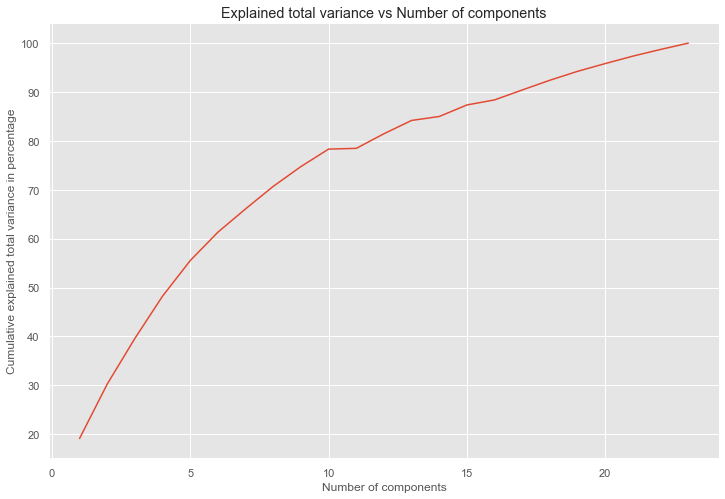

In [39]:
sns.lineplot(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], y=cumulative_variance_explained)
plt.title("Explained total variance vs Number of components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained total variance in percentage")

- Untuk menentukan jumlah component yang akan digunakan, pertimbangkan total variance untuk setiap component. Sebaiknya memilih jumlah component yang total variancenya sama dengan atau diatas 90%.
- Pada kasus ini digunakan komponen sebanyak 17 komponen, karena total variancenya sebesar 90.4%.

<h2 style='color: purple'>Project Data Onto Lower-Dimensional Linear Subspace</h2>

<h3 style='color: orange'>Eigen Vectors</h3>

In [21]:
eigen_vectors

array([[ 4.14750366e-02,  2.36979066e-02, -6.25030398e-02,
         7.02357881e-03,  9.95089442e-02, -1.10220826e-01,
         1.61662791e-01, -6.74327777e-01,  6.46247129e-01,
        -2.03816554e-01,  1.32917027e-02, -9.77564716e-02,
        -4.69587766e-02, -3.20137671e-02, -4.62879071e-02,
         9.55163099e-03,  5.53646486e-02,  7.42917614e-02,
        -5.92661848e-02,  1.56043854e-02, -6.33011644e-02,
        -1.16834087e-02,  1.19350608e-03],
       [ 3.23818123e-01,  4.45452091e-02,  1.42410960e-02,
         1.62335990e-02,  1.79260681e-01,  2.04315158e-01,
        -2.14144441e-01, -5.75036333e-02, -1.42451533e-01,
        -3.76100530e-02,  6.23085394e-03,  1.24231520e-01,
         3.93866677e-02,  5.00814201e-02, -5.28805917e-01,
        -1.83096270e-01, -9.04399574e-02,  4.27410533e-01,
        -4.23074141e-01,  1.46177139e-02, -1.81730419e-01,
        -2.69379811e-02,  1.06924358e-01],
       [-7.58120894e-02,  8.11881518e-03, -3.47127565e-02,
        -1.63626844e-02, -2.1

<h3 style='color: orange'>Projection Matrix</h3>

In [22]:
projection_matrix = (eigen_vectors.T[:][:])[:17].T
projection_matrix

array([[ 4.14750366e-02,  2.36979066e-02, -6.25030398e-02,
         7.02357881e-03,  9.95089442e-02, -1.10220826e-01,
         1.61662791e-01, -6.74327777e-01,  6.46247129e-01,
        -2.03816554e-01,  1.32917027e-02, -9.77564716e-02,
        -4.69587766e-02, -3.20137671e-02, -4.62879071e-02,
         9.55163099e-03,  5.53646486e-02],
       [ 3.23818123e-01,  4.45452091e-02,  1.42410960e-02,
         1.62335990e-02,  1.79260681e-01,  2.04315158e-01,
        -2.14144441e-01, -5.75036333e-02, -1.42451533e-01,
        -3.76100530e-02,  6.23085394e-03,  1.24231520e-01,
         3.93866677e-02,  5.00814201e-02, -5.28805917e-01,
        -1.83096270e-01, -9.04399574e-02],
       [-7.58120894e-02,  8.11881518e-03, -3.47127565e-02,
        -1.63626844e-02, -2.17664743e-02, -3.75696118e-01,
         5.82604416e-01, -1.85690947e-02, -4.34359194e-01,
        -4.30550414e-01,  2.26659724e-03, -2.22139116e-01,
        -1.38255882e-01, -1.11862912e-02, -2.23600985e-01,
        -3.40692476e-02, -8.3

<h3 style='color: orange'>Principal Component Analysis Result</h3>

In [23]:
X_pca = X.dot(projection_matrix)
X_pca

array([[-2.31000903,  2.38210462,  0.1858359 , ..., -0.37380145,
         0.10858677, -0.36278399],
       [-3.02659549,  2.27901186, -1.33593273, ..., -2.77447982,
         0.13541062, -0.43348972],
       [-2.76191873,  2.49039657, -1.98867304, ..., -1.19091247,
        -0.33607817, -0.45907789],
       ...,
       [-2.07868492,  0.33642926, -0.46885659, ...,  0.75353432,
        -0.16578886,  0.73119262],
       [-3.6235935 , -0.37629597,  1.29133425, ...,  0.46942721,
        -0.22472608,  0.8492284 ],
       [-0.37330229, -0.59364033, -1.05979834, ...,  0.5778548 ,
         0.12533139,  0.82019321]])

<h2 style='color: purple'>Show array data in dataframe</h2>

In [25]:
# Creating a list of index names 
index_values = list(range(0, 129487))
   
# Creating a list of column names 
column_values = ['Component Analysis 1', 'Component Analysis 2', 'Component Analysis 3', 'Component Analysis 4', 'Component Analysis 5', 'Component Analysis 6', 'Component Analysis 7', 'Component Analysis 8', 'Component Analysis 9', 'Component Analysis 10', 'Component Analysis 11', 'Component Analysis 12', 'Component Analysis 13', 'Component Analysis 14', 'Component Analysis 15', 'Component Analysis 16', 'Component Analysis 17'] 
  
# Creating the dataframe
dataframe_pca = pd.DataFrame(data = X_pca,  
                  index = index_values,  
                  columns = column_values)

# Displaying the dataframe in table
dataframe_pca

Component Analysis 1  Component Analysis 2  Component Analysis 3  \
0                  -2.310009              2.382105              0.185836   
1                  -3.026595              2.279012             -1.335933   
2                  -2.761919              2.490397             -1.988673   
3                  -3.621272              1.748263              2.883137   
4                  -1.847624              2.472830              2.756153   
...                      ...                   ...                   ...   
129482             -0.150237             -2.838073             -1.272030   
129483             -4.112650             -0.624786             -0.086056   
129484             -2.078685              0.336429             -0.468857   
129485             -3.623594             -0.376296              1.291334   
129486             -0.373302             -0.593640             -1.059798   

        Component Analysis 4  Component Analysis 5  Component Analysis 6  \
0                   1.357654             -0.866072              3.329544   
1                 -10.561775             -0.117973              2.097485   
2                   0.707172             -1.173672             -0.253464   
3                   1.564373             -0.581745              2.971064   
4                   1.502329             -1.261444              2.479895   
...                      ...                   ...                   ...   
129482              0.753157             -0.371636              0.873590   
129483             -5.452066             -0.160516              1.128584   
129484             -4.991401             -1.436288              1.234561   
129485             -6.280275             -1.719444              1.907139   
129486             -6.609441             -1.908060             -0.040726   

        Component Analysis 7  Component Analysis 8  Component Analysis 9  \
0                  -0.370559             -0.750035             -1.790539   
1                   1.037655             -0.838168              0.767545   
2                  -1.628634             -1.206078              0.935871   
3                  -0.421745             -1.662546             -0.975184   
4                   0.821349             -2.382186              0.793657   
...                      ...                   ...                   ...   
129482             -1.723965             -2.275447              0.164705   
129483              2.260678              0.094107              1.274758   
129484              1.715624             -0.581501              1.361200   
129485              1.092342              0.918526             -1.272917   
129486             -0.638535             -0.529447              0.915646   

        Component Analysis 10  Component Analysis 11  Component Analysis 12  \
0                    1.255533              -0.023323              -0.265202   
1                   -0.911554              -0.150469               0.355268   
2                    1.348883               0.012273               0.131939   
3                    1.093171              -0.013342               0.394203   
4                    1.151136               0.013984               0.045580   
...                       ...                    ...                    ...   
129482              -0.790934               0.018614              -0.189753   
129483              -0.678809              -0.070899               0.827063   
129484              -2.001763               0.124977               0.114551   
129485              -1.188696               0.144616               0.641886   
129486              -0.363468              -0.032373               1.750218   

        Component Analysis 13  Component Analysis 14  Component Analysis 15  \
0                    2.087858              -1.095112              -0.373801   
1                    0.166083              -0.642519              -2.774480   
2                   -0.292656               0.193352              -1.190912   
3   

<h2 style='color: purple'>Show dataframe with scatterplot</h2>

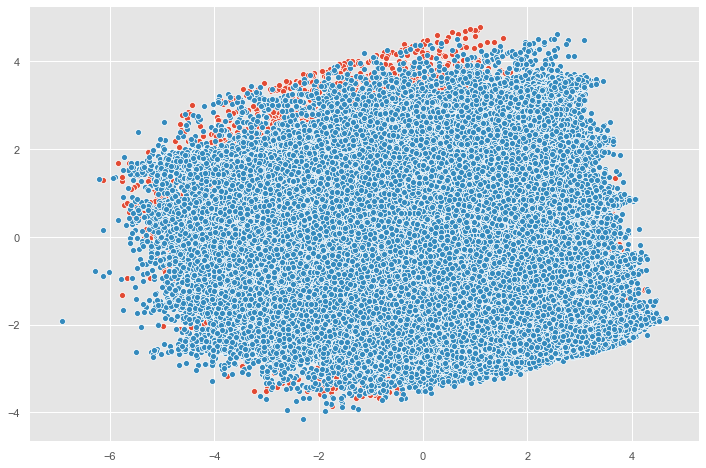

In [26]:
for satisfaction in (0, 1):
    sns.scatterplot (
        X_pca[y == satisfaction, 0],
        X_pca[y == satisfaction, 1]
    )

<h1 style='color: green; text-align:center'>Logistic Regression with Dataframe from Principal Component Analysis Result</h1>

<h2 style='color: purple'>Concate all columns dataframe_pca with column Customer Type from airline_passenger_satisfaction_replace dataframe</h2>

In [40]:
new_dataframe = pd.concat([dataframe_pca.reset_index(drop=True), airline_passenger_satisfaction_replace['Customer Type'].reset_index(drop=True)], axis=1)

<h2 style='color: purple'>Show new dataframe in table</h2>

In [28]:
new_dataframe

Component Analysis 1  Component Analysis 2  Component Analysis 3  \
0                  -2.310009              2.382105              0.185836   
1                  -3.026595              2.279012             -1.335933   
2                  -2.761919              2.490397             -1.988673   
3                  -3.621272              1.748263              2.883137   
4                  -1.847624              2.472830              2.756153   
...                      ...                   ...                   ...   
129482             -0.150237             -2.838073             -1.272030   
129483             -4.112650             -0.624786             -0.086056   
129484             -2.078685              0.336429             -0.468857   
129485             -3.623594             -0.376296              1.291334   
129486             -0.373302             -0.593640             -1.059798   

        Component Analysis 4  Component Analysis 5  Component Analysis 6  \
0                   1.357654             -0.866072              3.329544   
1                 -10.561775             -0.117973              2.097485   
2                   0.707172             -1.173672             -0.253464   
3                   1.564373             -0.581745              2.971064   
4                   1.502329             -1.261444              2.479895   
...                      ...                   ...                   ...   
129482              0.753157             -0.371636              0.873590   
129483             -5.452066             -0.160516              1.128584   
129484             -4.991401             -1.436288              1.234561   
129485             -6.280275             -1.719444              1.907139   
129486             -6.609441             -1.908060             -0.040726   

        Component Analysis 7  Component Analysis 8  Component Analysis 9  \
0                  -0.370559             -0.750035             -1.790539   
1                   1.037655             -0.838168              0.767545   
2                  -1.628634             -1.206078              0.935871   
3                  -0.421745             -1.662546             -0.975184   
4                   0.821349             -2.382186              0.793657   
...                      ...                   ...                   ...   
129482             -1.723965             -2.275447              0.164705   
129483              2.260678              0.094107              1.274758   
129484              1.715624             -0.581501              1.361200   
129485              1.092342              0.918526             -1.272917   
129486             -0.638535             -0.529447              0.915646   

        Component Analysis 10  Component Analysis 11  Component Analysis 12  \
0                    1.255533              -0.023323              -0.265202   
1                   -0.911554              -0.150469               0.355268   
2                    1.348883               0.012273               0.131939   
3                    1.093171              -0.013342               0.394203   
4                    1.151136               0.013984               0.045580   
...                       ...                    ...                    ...   
129482              -0.790934               0.018614              -0.189753   
129483              -0.678809              -0.070899               0.827063   
129484              -2.001763               0.124977               0.114551   
129485              -1.188696               0.144616               0.641886   
129486              -0.363468              -0.032373               1.750218   

        Component Analysis 13  Component Analysis 14  Component Analysis 15  \
0                    2.087858              -1.095112              -0.373801   
1                    0.166083              -0.642519              -2.774480   
2                   -0.292656               0.193352              -1.190912   
3   

<h2 style='color: purple'>Initialize variable criterion and predictor</h2>

In [41]:
criterion = new_dataframe['Customer Type']
predictor = new_dataframe[['Component Analysis 1'] + ['Component Analysis 2'] + ['Component Analysis 3'] + ['Component Analysis 4'] + ['Component Analysis 5'] + ['Component Analysis 6'] + ['Component Analysis 7'] + ['Component Analysis 8'] + ['Component Analysis 9'] + ['Component Analysis 10'] + ['Component Analysis 11'] + ['Component Analysis 12'] + ['Component Analysis 13'] + ['Component Analysis 14'] + ['Component Analysis 15'] + ['Component Analysis 16'] + ['Component Analysis 17']]

<h2 style='color: purple'>Create logistic regression model</h2>

In [42]:
X = sm.add_constant(predictor)

In [43]:
reg_log         = sm.Logit(criterion, X)
results_reg_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.264745
         Iterations 8


In [44]:
results_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Customer Type   No. Observations:               129487
Model:                          Logit   Df Residuals:                   129469
Method:                           MLE   Df Model:                           17
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.4440
Time:                        11:34:10   Log-Likelihood:                -34281.
converged:                       True   LL-Null:                       -61651.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.8955      0.017    169.949      0.000       2.862       2.929
Component Analysis 1      0.3376      0.005     68.511      0.000       0.328       0.347
Component Analysis 2     -0.0217      0.007     -3.121      0.002      -0.035      -0.008
Component Analysis 3      0.0814      0.007     11.442      0.000       0.067       0.095
Component Analysis 4      0.0587      0.007      8.193      0.000       0.045       0.073
Component Analysis 5     -0.4094      0.010    -42.988      0.000      -0.428      -0.391
Component Analysis 6      0.8772      0.010     85.539      0.000       0.857       0.897
Component Analysis 7      0.5299      0.011     50.276      0.000       0.509       0.551
Component Analysis 8     -0.5953      0.010    -57.274      0.000      -0.616      -0.575
Component Analysis 9     -0.4637      0.010    -46.271      0.000      -0.483      -0.444
Component Analysis 10    -0.3704      0.010    -35.325      0.000      -0.391      -0.350
Component Analysis 11     0.1757      0.051      3.421      0.001       0.075       0.276
Component Analysis 12     1.7492      0.015    115.093      0.000       1.719       1.779
Component Analysis 13     0.6807      0.012     56.041      0.000       0.657       0.705
Component Analysis 14    -1.2372      0.026    -47.192      0.000      -1.289      -1.186
Component Analysis 15    -1.3163      0.015    -87.896      0.000      -1.346      -1.287
Component Analysis 16     0.0871      0.020      4.459      0.000       0.049       0.125
Component Analysis 17    -0.5325      0.014    -39.402      0.000      -0.559      -0.506
=========================================================================================
"""

Penjelasan tabel summary:
- Log-Likelihood, mengestimasi seberapa besar kemungkinan model yang dimiliki berhasil menjelaskan hubungan antarvariabel yang ada dengan target output. Semakin tinggi nilai log likelihood function, maka semakin tinggi probabilitas model akurat. Pada model yang telah dibuat nilai log-likelihood sebesar -34281 dengan iterasi sebanyak 8 kali dengan nilai log-likelihood awal atau model awal sebesar -61651.
- LL Ratio p-value, model akhir yang dihasilkan signifikan berbeda dengan base model. LL Ratio p-value sebesar 0.00, ini memperlihatkan bahwa model akhir yang dibuat signifikan berbeda dari base model.
- Pseudo R-square, melihat nilai goodness-of-fit dari model yang dihasilkan. Pada model yang dibuat nilai Pseudo R-square sebesar 0.4440

<h2 style='color: purple'>Check Accuracy</h2>

In [45]:
np.set_printoptions(formatter={'float' : lambda x: '{0:0.2f}'.format(x)})
results_reg_log.predict()

array([1.00, 1.00, 0.93, ..., 0.99, 1.00, 0.99])

In [46]:
np.array(airline_passenger_satisfaction_replace['Customer Type'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
results_reg_log.pred_table()

array([[14459.00, 9255.00],
       [5521.00, 100252.00]])

In [48]:
confusion_matrix         = pd.DataFrame(results_reg_log.pred_table())
confusion_matrix.columns = ['Predicted 0', 'Predicted 1']
confusion_matrix         = confusion_matrix.rename(index={0: 'Actual 0', 1:'Actual 1'})
confusion_matrix

Predicted 0  Predicted 1
Actual 0      14459.0       9255.0
Actual 1       5521.0     100252.0

- Actualnya disloyal dan prediksinya disloyal adalah sebanyak 14459 kasus
- Actualnya loyal dan prediksinya loyal adalah sebanyak 100252 kasus
- Actualnya disloyal dan prediksinya loyal adalah sebanyak 9255 kasus
- Actualnya loyal dan prediksinya disloyal adalah sebanyak 5521 kasus

Maka akurasi dari model yang telah dibuat sebesar<br>
Accuracy = (Actual 0 and Predicted 0 + Actual 1 and Predicted 1) / (Actual 0 and Predicted 1 + Actual 1 and Predicted 0)<br>
= (14459 + 100252) / (9255 + 5521)<br>
= 77.6%<br><br>
Akurasi dari model yang dihasilkan adalah 77.6%.